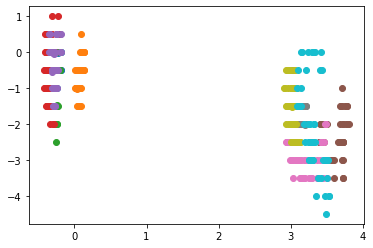

In [16]:
import os
import sys

sys.path.extend(['d:\\atom\\python'])

import data_manager as dm
import clean_data as cleaner

folder = 'D:\\Atom\\exp\\20210411'
ds = [101, 102, 103, 104, 105]

data = {}
## water
for d in ds:
    df_f = dm.import_from_file(os.path.join(folder, 'd%d_water_f.csv' % d), dm.epc_water)
    df_t = dm.import_from_file(os.path.join(folder, 'd%d_water_t.csv' % d), dm.epc_water)
    df_f = cleaner.kde_peak(df_f)
    df_t = cleaner.kde_peak(df_t)
    plt.scatter(np.unwrap(df_f['PHASE'] - np.unwrap(df_t['PHASE'])), df_f['RSSI'] - df_t['RSSI'])
    data['water_%d_p' % d] = np.unwrap(df_f['PHASE'] - np.unwrap(df_t['PHASE']))
    data['water_%d_r' % d] = df_f['RSSI'].values - df_t['RSSI'].values

# plt.legend(ds)
# plt.title('water')
# plt.show()

## oil
for d in ds:
    df_f = dm.import_from_file(os.path.join(folder, 'd%d_oil_f.csv' % d), dm.epc_oil)
    df_t = dm.import_from_file(os.path.join(folder, 'd%d_oil_t.csv' % d), dm.epc_oil)
    df_f = cleaner.kde_peak(df_f)
    df_t = cleaner.kde_peak(df_t)
    plt.scatter(np.unwrap(df_f['PHASE'] - np.unwrap(df_t['PHASE'])), df_f['RSSI'] - df_t['RSSI'], )
    
    data['oil_%d_p' % d] = np.unwrap(df_f['PHASE'] - np.unwrap(df_t['PHASE']))
    data['oil_%d_r' % d] = df_f['RSSI'].values - df_t['RSSI'].values

# plt.legend(ds)
# plt.title('oil')
plt.show()

import scipy.io
scipy.io.savemat('rotation.mat', data)